In [24]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# Load the json files
with open('tweets_manual_labelling.json', 'r', encoding='utf-8') as f:
    tweets_manual = json.load(f)
with open('tweets.json', 'r', encoding='utf-8') as f:
    tweets_auto = json.load(f)

# Create DataFrames for easier comparison
manual_df = pd.DataFrame(tweets_manual)
auto_df = pd.DataFrame(tweets_auto)

In [8]:
manual_df.head()

,tweet_count,unique_id,username,text,hashtags,created_at,retweet_count,favorite_count,reply_count,image_paths,sentiment
0,1,azwar6102,Azwar Rozali,Sebenarnya presiden Prabowo tidak perlu banyak...,[],2025-01-01 03:26:45,0,0,0,[],Negative
1,2,B_dzoel,°Bang_Dzoel°,Hadiah 100 hari kerja kabinet Merah-Putih @pra...,[100HariKabinetOmon],2025-01-01 01:34:19,12,28,5,[C:\Users\hariz\projects\tweet_scraping\images...,Negative
2,3,RiskyDeswandi,riskydeswandi28,"H-19, penilaian 100 Hari Kerja Pemerintahan Re...",[prabowo],2025-01-01 00:17:07,0,0,0,[],Neutral
3,4,AlimyFikri,Singgih,@Dennysiregar7 Baru belum 100 hari sdh bosan s...,[],2025-01-01 13:15:48,0,0,0,[],Negative
4,5,DitriRizki_D3,dit_RI,@Mdy_Asmara1701 Blunder Pak Prabowo kok bisa m...,[],2025-01-01 23:56:41,0,9,1,[],Negative


In [17]:
# Ensure we're comparing the same tweets by matching on unique_id
merged_df = pd.merge(
    manual_df[['tweet_count', 'unique_id', 'text', 'sentiment']], 
    auto_df[['tweet_count', 'sentiment']], 
    on='tweet_count', 
    suffixes=('_manual', '_auto')
)

In [18]:
merged_df.head()

,tweet_count,unique_id,text,sentiment_manual,sentiment_auto
0,1,azwar6102,Sebenarnya presiden Prabowo tidak perlu banyak...,Negative,Neutral
1,2,B_dzoel,Hadiah 100 hari kerja kabinet Merah-Putih @pra...,Negative,Neutral
2,3,RiskyDeswandi,"H-19, penilaian 100 Hari Kerja Pemerintahan Re...",Neutral,Neutral
3,4,AlimyFikri,@Dennysiregar7 Baru belum 100 hari sdh bosan s...,Negative,Negative
4,5,DitriRizki_D3,@Mdy_Asmara1701 Blunder Pak Prabowo kok bisa m...,Negative,Neutral


In [15]:
print(f"Total tweets in manual labeling: {len(manual_df)}")
print(f"Total tweets in auto labeling: {len(auto_df)}")
print(f"Total matched tweets: {len(merged_df)}")

Total tweets in manual labeling: 3696
Total tweets in auto labeling: 3696
Total matched tweets: 3696


In [19]:
# Calculate agreement statistics
agreement = (merged_df['sentiment_manual'] == merged_df['sentiment_auto']).mean() * 100
print(f"Agreement percentage: {agreement:.2f}%")

Agreement percentage: 22.97%


In [20]:
# Create confusion matrix
labels = ['Negative', 'Neutral', 'Positive']
cm = confusion_matrix(
    merged_df['sentiment_manual'], 
    merged_df['sentiment_auto'],
    labels=labels
)

In [21]:
# Print classification report
print("\nClassification Report:")
print(classification_report(
    merged_df['sentiment_manual'], 
    merged_df['sentiment_auto'],
    labels=labels
))


Classification Report:
              precision    recall  f1-score   support

    Negative       0.29      0.44      0.35      1209
     Neutral       0.15      0.47      0.23       541
    Positive       0.45      0.03      0.06      1946

    accuracy                           0.23      3696
   macro avg       0.29      0.31      0.21      3696
weighted avg       0.35      0.23      0.18      3696



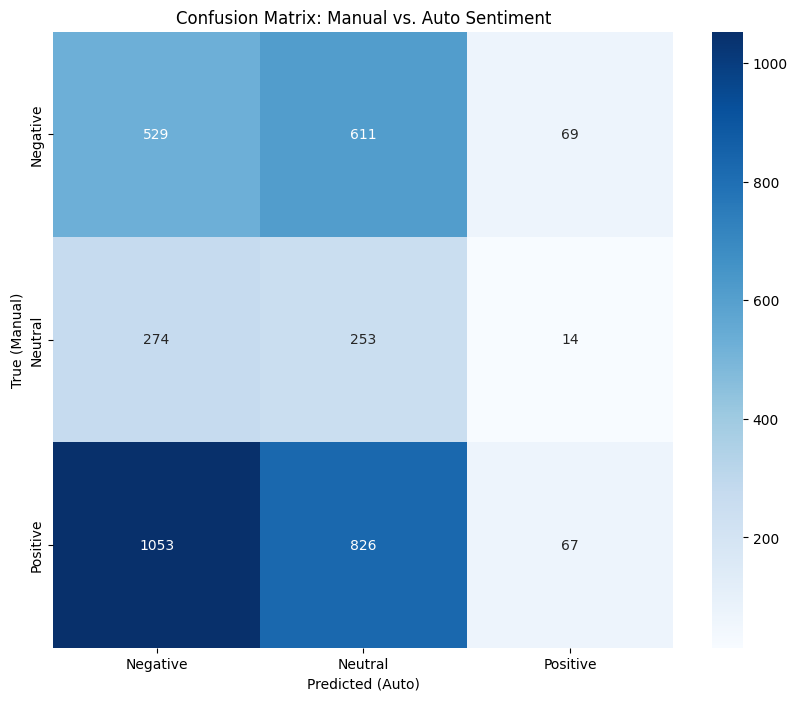

In [25]:
# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted (Auto)')
plt.ylabel('True (Manual)')
plt.title('Confusion Matrix: Manual vs. Auto Sentiment')
plt.savefig('c:/Users/hariz/projects/tweet-labeler/sentiment_confusion_matrix.png')

In [27]:
# Analyze disagreements
disagreements = merged_df[merged_df['sentiment_manual'] != merged_df['sentiment_auto']]
print(f"\nTotal disagreements: {len(disagreements)}")


Total disagreements: 2847


In [28]:
# Show distribution of disagreements
disagreement_types = disagreements.groupby(['sentiment_manual', 'sentiment_auto']).size().reset_index()
disagreement_types.columns = ['Manual', 'Auto', 'Count']
disagreement_types = disagreement_types.sort_values('Count', ascending=False)
print("\nTop disagreement patterns:")
print(disagreement_types)


Top disagreement patterns:
     Manual      Auto  Count
4  Positive  Negative   1053
5  Positive   Neutral    826
0  Negative   Neutral    611
2   Neutral  Negative    274
1  Negative  Positive     69
3   Neutral  Positive     14


In [29]:
# Create a sample of disagreements for manual review
sample_size = min(10, len(disagreements))
sample_disagreements = disagreements.sample(sample_size)
print(f"\nSample of {sample_size} disagreements for review:")
for i, row in enumerate(sample_disagreements.itertuples(), 1):
    print(f"\n{i}. Tweet: {row.text[:100]}...")
    print(f"   Manual: {row.sentiment_manual}, Auto: {row.sentiment_auto}")


Sample of 10 disagreements for review:

1. Tweet: Menurut ahli komunikasi politik prabowo menunjukkan inkonsisten di 100 hari kepemimpinannya.

Kata A...
   Manual: Negative, Auto: Positive

2. Tweet: Presiden @prabowo mendapat "Surat Cinta" dari siswa SD berkat Makan Bergizi Gratis

Hari pertama pro...
   Manual: Positive, Auto: Negative

3. Tweet: Kinerja 100 hari Prabowo-Gibran bikin bangga! Apresiasi tinggi dari masyarakat jadi bukti nyata #Kin...
   Manual: Positive, Auto: Negative

4. Tweet: @SBaigin @Boediantar4 @prabowo Hampir 100 hari pak lum kiatan .....
   Manual: Negative, Auto: Neutral

5. Tweet: Setelah dilantik dan 100 hari kerja presiden, Publik mempercayai 80% kinerja bapak @prabowo 🙏🏻
Janga...
   Manual: Positive, Auto: Neutral

6. Tweet: Berdasarkan survei Litbang Kompas, tingkat kepuasan publik terhadap kinerja 100 hari pemerintahan Pr...
   Manual: Positive, Auto: Negative

7. Tweet: Masyarakat kasih apresiasi gede buat kerja positif 100 hari Prabowo-Gibran #Kiner

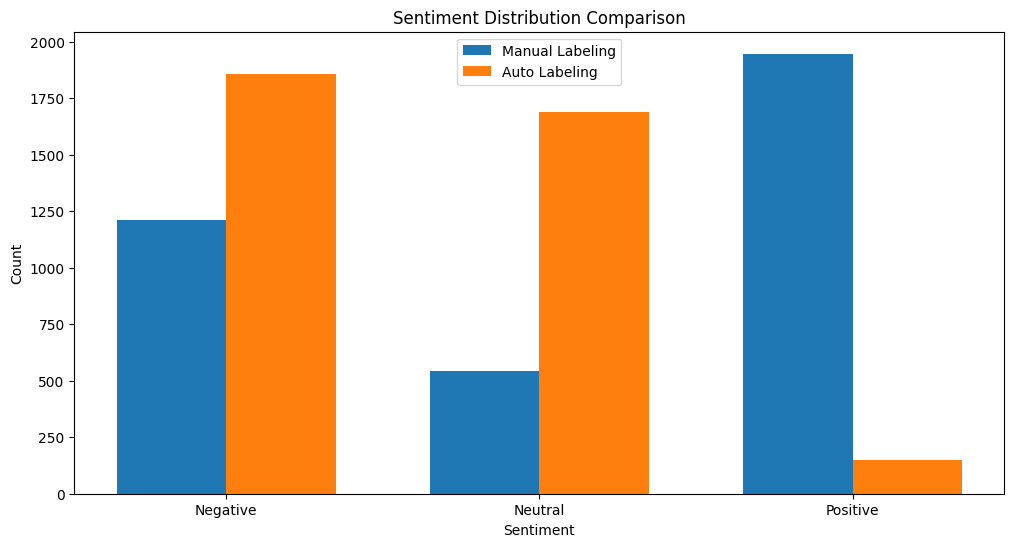

In [32]:
# Visualize sentiment distribution comparison
plt.figure(figsize=(12, 6))

# Count sentiments in each dataset
manual_counts = manual_df['sentiment'].value_counts().reindex(labels, fill_value=0)
auto_counts = auto_df['sentiment'].value_counts().reindex(labels, fill_value=0)

# Create grouped bar chart
x = range(len(labels))
width = 0.35
plt.bar([i - width/2 for i in x], manual_counts, width, label='Manual Labeling')
plt.bar([i + width/2 for i in x], auto_counts, width, label='Auto Labeling')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution Comparison')
plt.xticks(x, labels)
plt.legend()